<a href="https://colab.research.google.com/github/agatucha07-ship-it/trabajo_final_lenguajes_programacion/blob/main/trabajo_tercera_unidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# traer la base de datos
import pandas as pd
# crear objeto
datos = pd.read_csv("/content/drive/MyDrive/lenguajes programacion/test/student-scores.csv")
datos.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [4]:
datos.info()
# puedo ver rapidamente la cantidad de columnas que tiene ese dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [6]:
print(datos['gender'].unique()) # 2 tabs
print(datos['extracurricular_activities'].unique()) # 2 tabs

['male' 'female']
[False  True]


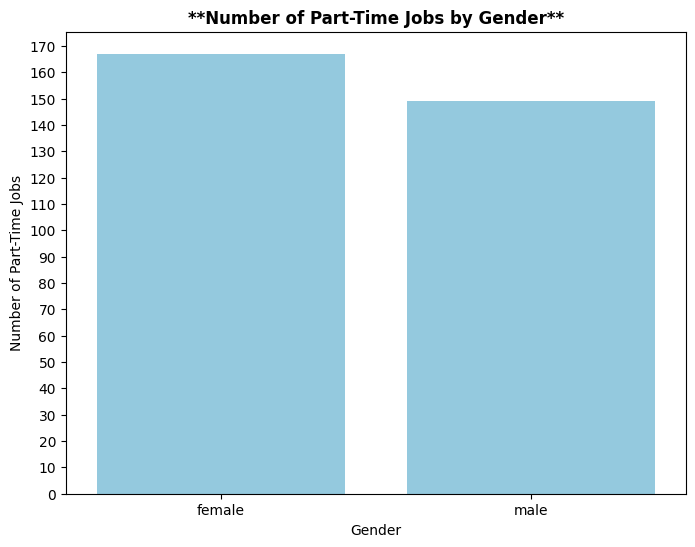

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Group by gender and count part-time jobs
gender_job_counts = datos.groupby('gender')['part_time_job'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='part_time_job', data=gender_job_counts, color='skyblue')
plt.title('**Number of Part-Time Jobs by Gender**', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Part-Time Jobs')

# Set y-axis major locator to show ticks every 10 units
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))

plt.show()

# Task
Generate a line plot showing the average score of students by gender for the columns 'math_score', 'history_score', and 'physics_score'. The x-axis should represent the subjects and the y-axis should represent the average score.

## Seleccionar columnas de puntaje

### Subtask:
Identificar las columnas que contienen los puntajes de las materias ('math_score', 'history_score', 'physics_score').


**Reasoning**:
Create a list of the score columns and select these columns along with the 'gender' column from the DataFrame.



In [10]:
score_columns = ['math_score', 'history_score', 'physics_score']
score_df = datos[['gender'] + score_columns]
score_df.head()

,gender,math_score,history_score,physics_score
0,male,73,81,93
1,female,90,86,96
2,female,81,97,95
3,female,71,74,88
4,male,84,77,65


## Agrupar por género y calcular el promedio

### Subtask:
Agrupar los datos por género y calcular el promedio de los puntajes para cada una de las materias seleccionadas.


**Reasoning**:
Group the DataFrame by gender and calculate the mean of the score columns.



In [11]:
average_scores_by_gender = score_df.groupby('gender')[score_columns].mean().reset_index()
display(average_scores_by_gender)

,gender,math_score,history_score,physics_score
0,female,82.792415,80.495010,80.678643
1,male,84.114228,80.168337,81.996994


## Preparar los datos para el gráfico

### Subtask:
Transformar los datos agrupados a un formato adecuado para la creación del gráfico de líneas.


**Reasoning**:
Transform the grouped data into a long format suitable for plotting using `melt`.



In [12]:
melted_scores = pd.melt(average_scores_by_gender,
                        id_vars='gender',
                        var_name='Subject',
                        value_name='Average Score')
display(melted_scores.head())

,gender,Subject,Average Score
0,female,math_score,82.792415
1,male,math_score,84.114228
2,female,history_score,80.495010
3,male,history_score,80.168337
4,female,physics_score,80.678643


## Generar el gráfico de líneas

### Subtask:
Crear el gráfico de líneas utilizando los datos preparados, con las materias en el eje X y el promedio de puntaje en el eje Y, mostrando una línea para cada género.


**Reasoning**:
Generate a line plot using the prepared data, with subjects on the x-axis and average score on the y-axis, showing a line for each gender.



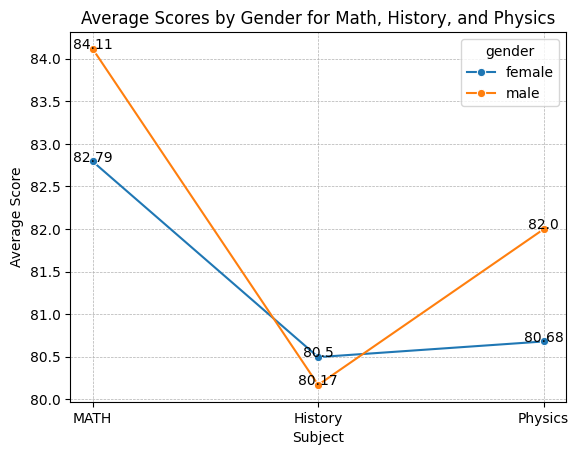

In [15]:
line_plot = sns.lineplot(x='Subject', y='Average Score', hue='gender', data=melted_scores, marker='o')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add labels to data points
for index, row in melted_scores.iterrows():
    line_plot.text(row['Subject'], row['Average Score'], round(row['Average Score'], 2), color='black', ha="center")

plt.title('Average Scores by Gender for Math, History, and Physics')
plt.xlabel('Subject')
plt.ylabel('Average Score')

# Change x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=['MATH', 'History', 'Physics'])

plt.show()

## Añadir etiquetas y título

### Subtask:
Asegurarse de que el gráfico tenga etiquetas claras en los ejes y un título descriptivo.


## Mostrar el gráfico

### Subtask:
Visualizar el gráfico generado.


**Reasoning**:
Display the generated plot.



In [14]:
plt.show()

## Summary:

### Data Analysis Key Findings

*   A new DataFrame `score_df` was created containing the 'gender' and the specified score columns ('math\_score', 'history\_score', 'physics\_score').
*   The average scores for each subject were calculated for both genders.
*   The data was successfully transformed into a long format suitable for plotting, with columns for 'gender', 'Subject', and 'Average Score'.
*   A line plot was generated showing the average scores by gender for each subject, with 'Subject' on the x-axis and 'Average Score' on the y-axis.
*   The plot included a title "Average Scores by Gender for Math, History, and Physics".

### Insights or Next Steps

*   The plot visually represents the average performance of male and female students across the three subjects, allowing for easy comparison.
*   Further analysis could involve statistical tests to determine if the observed differences in average scores between genders are statistically significant.
